In [1]:
using OperatorApproximation

[ Info: Precompiling OperatorApproximation [c7ec8986-4b84-48ba-9795-9bd526637602]


In [2]:
x,t = 0.0,0.0
r = k -> 0.5exp(-k^2)*exp(1im*(4t*k^2+2x*k))
G = [k->1-abs2(r(k)) k->-conj(r(k)); r k->1 ]
intervals = [-6 6]
jumps = [G]
c = [1,0]' # behavior at infintiy
RHP = RHSolver(intervals,jumps);
u = RHP(c,300)
1/pi*sum(u[2])

0.28901709868535375 + 1.987846675914698e-17im

# Larger times

0.0485712057543881 - 0.01995728931073724im

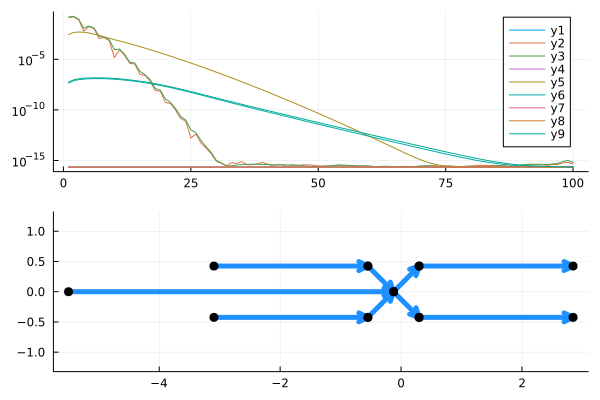

In [5]:
x,t = 4.0,8.0
θ = z -> 4t*z^2+2x*z
r = k -> 0.5*exp(-k^2)
r̄ = z -> conj(r(conj(z)))    

mkfun = y -> mvf2mof(y,2,2)
L = (z -> [1 0; r(z)/(1-r(z)r̄(z))*exp(im*θ(z)) 1]) |> mkfun
D = (z -> [1-r(z)r̄(z) 0; 0 1/(1-r(z)r̄(z))]) |> mkfun
U = (z -> [1 -r̄(z)/(1-r(z)r̄(z))*exp(-im*θ(z)); 0 1]) |> mkfun
P = (z -> [1 0; r(z)*exp(im*θ(z)) 1]) |> mkfun
M = (z -> [1 -r̄(z)*exp(-im*θ(z)); 0 1]) |> mkfun

z₀ = -x/(4t)
rad = .6

Γ₀(r,R) = [r*exp(im*pi/4) R*exp(im*pi/4);
    r*exp(-im*pi/4) R*exp(-im*pi/4);
    R*exp(3im*pi/4) r*exp(3im*pi/4);
    R*exp(-3im*pi/4) r*exp(-3im*pi/4)]

H₀(L) = [-L+im -1+im;
        -L-im -1-im; 
        1+im L+im;
        1-im L-im]/sqrt(2);

Γ = vcat(Γ₀(0,rad) .+ z₀, [-5.5 z₀], H₀(7)*rad .+ z₀)
J = [P,M,U,L,D,U,L,P,M] 
RHP = RHSolver(Γ,J);
c = [1 0]
u = RHP(c,1800)
pc = coefplot(u[2])
1/pi*sum(u[2]) |> display


pdom = domainplot(u[2])

plot(pc,pdom,layout = (2,1))